In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/'
x1ds = np.hstack((glob.glob('{}*x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28040_sx1.fits'],
      dtype='<U68')

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27010_x1d.fits
G140L
[85.24121]


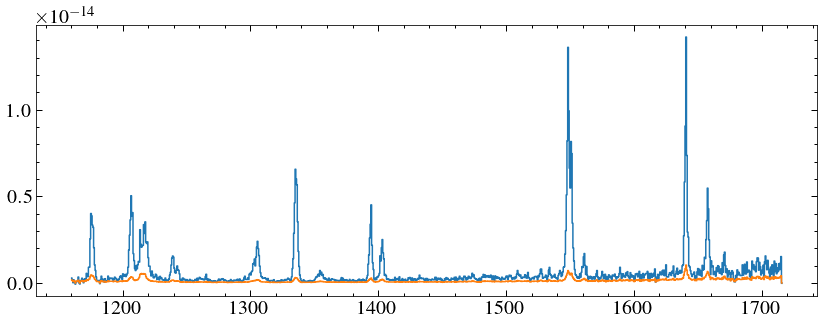

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27020_x1d.fits
G140L
[85.70035]


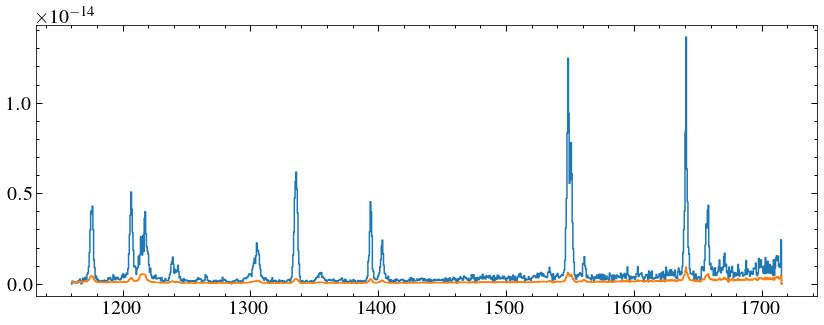

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27030_x1d.fits
G140L
[85.91894]


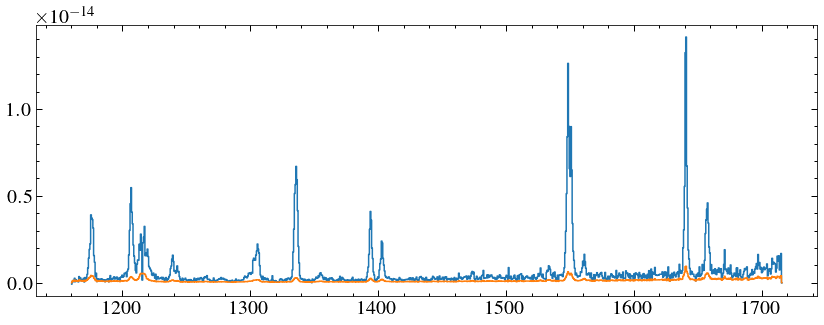

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27040_x1d.fits
G140L
[85.88886]


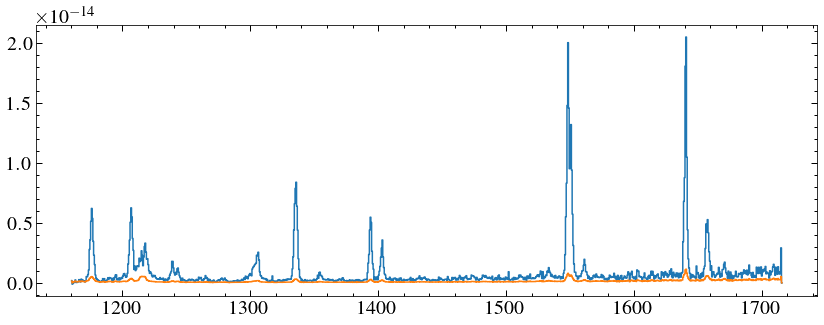

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28010_x1d.fits
G140L
[88.22849]


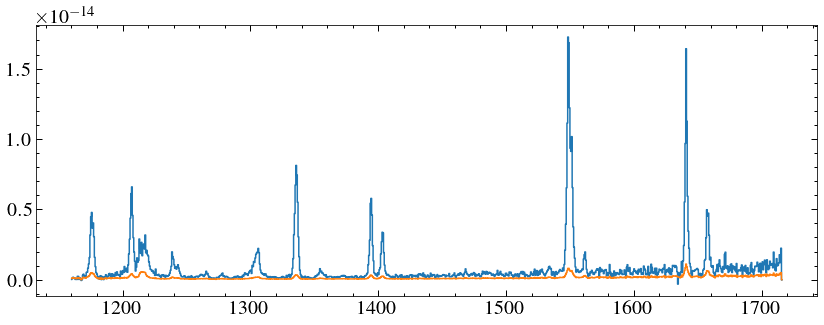

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28020_x1d.fits
G140L
[88.42286]


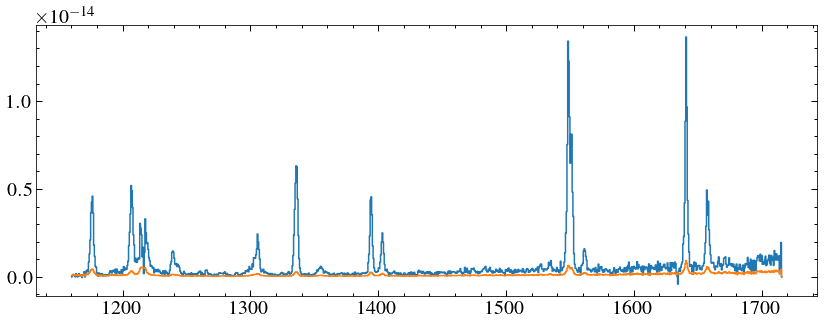

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28030_x1d.fits
G230L
[494.1262]


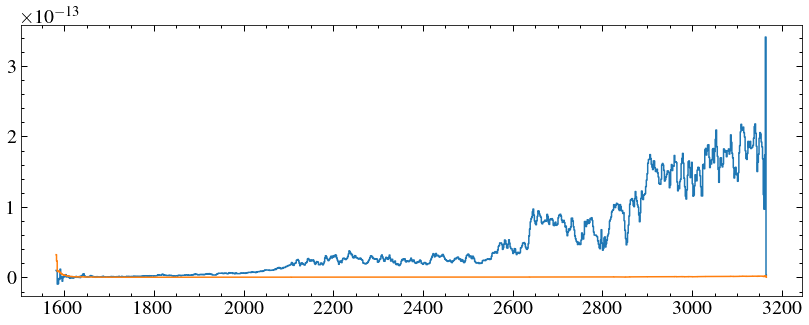

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28040_sx1.fits
G430L
[894.85034]


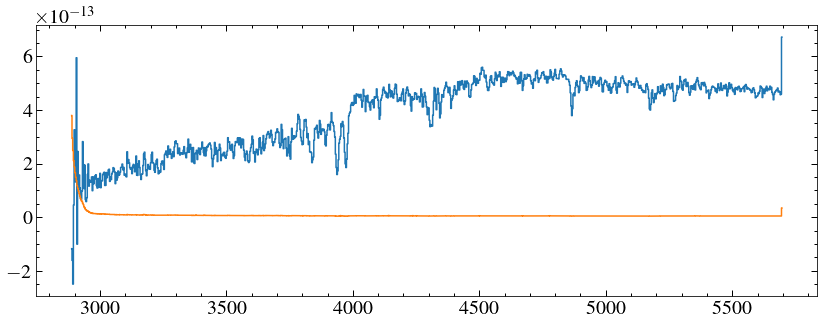

In [3]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1')
    plt.show()


Wow! Any evidence for flares in G140L?

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27010_x1d.fits
G140L
[85.24121]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27020_x1d.fits
G140L
[85.70035]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27030_x1d.fits
G140L
[85.91894]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27040_x1d.fits
G140L
[85.88886]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28010_x1d.fits
G140L
[88.22849]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28020_x1d.fits
G140L
[88.42286]


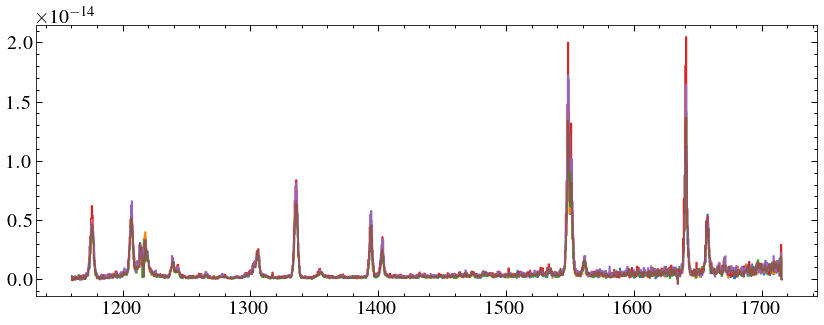

In [4]:
for x in x1ds[0:6]:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid', c='C1')
    # plt.show()


No? Go back and have closer look in a bit

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27010_x1d.fits
G140L
[85.24121]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27020_x1d.fits
G140L
[85.70035]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27030_x1d.fits
G140L
[85.91894]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27040_x1d.fits
G140L
[85.88886]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28010_x1d.fits
G140L
[88.22849]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28020_x1d.fits
G140L
[88.42286]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28030_x1d.fits
G230L
[494.1262]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28040_sx1.fits
G430L
[894.85034]


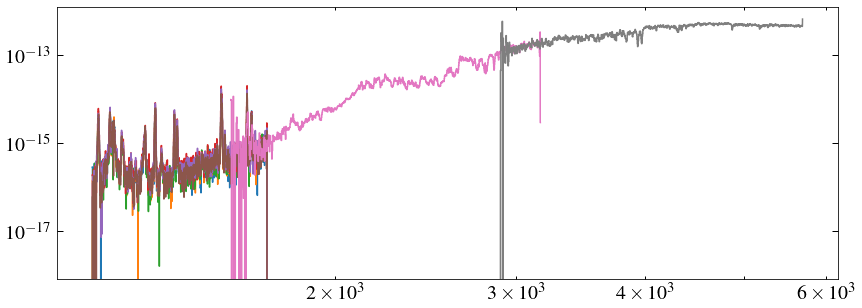

In [5]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid', c='C1')
    # plt.show()
plt.yscale('log')
plt.xscale('log')


In [6]:
def spectra_adder(f_array, e_array, scale_correct=True):
    """
    Returns a variance-weighted coadd with standard error of the weighted mean (variance weights, scale corrected).
    f_array and e_arrays are collections of flux and error arrays, which should have the same lenth and wavelength scale
    """
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1) #reduced chi-squared
    if scale_correct:
        error = (var * rcs)**0.5
    else:
        error = var**2
    return flux,error

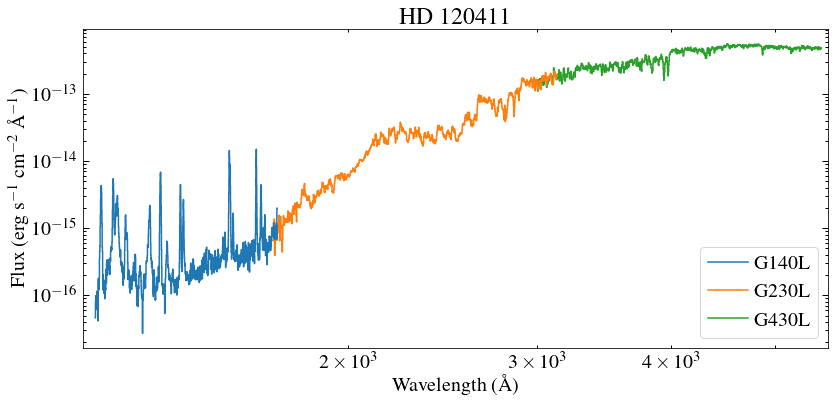

In [7]:
w_fuv = []
f_fuv = []
e_fuv = []
roots = []
n=0
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G140L':
        roots.append(fits.getheader(x, 0)['ROOTNAME'])
        mask = (w > 1160)
        w, f, e = w[mask], f[mask], e[mask]
        if n == 0:
            w_fuv = w
            f_fuv.append(f)
            e_fuv.append(e)
        else:
            f_fuv.append(interp1d(w, f, fill_value='extrapolate')(w_fuv))
            e_fuv.append(interp1d(w, e, fill_value='extrapolate')(w_fuv))            
        n +=1
    if grating == 'G230L':
        mask = (w > 1700) & (w <3130)
        w_nuv, f_nuv, e_nuv = w[mask], f[mask], e[mask]
    if grating == 'G430L':
        mask = (w > 3000) & (w <5520)
        w_opt, f_opt, e_opt = w[mask], f[mask], e[mask]


        
        
f_fuv, e_fuv = spectra_adder(np.array(f_fuv), np.array(e_fuv), scale_correct=True)
mask = (f_fuv > 0)
w_fuv, f_fuv, e_fuv = w_fuv[mask], f_fuv[mask], e_fuv[mask]


plt.figure(figsize=(12, 6))

plt.step(w_fuv, f_fuv, where='mid', label='G140L')
# plt.step(w_fuv, e_fuv, where='mid')
plt.step(w_nuv, f_nuv, where='mid', label='G230L', zorder=-1)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2)

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=4)
plt.title('HD 120411')
plt.xlim(1130, 5600)
plt.tight_layout()
plt.savefig('plots/hd120411_ql.pdf')
plt.savefig('plots/HD-120411_ql.png', facecolor='w')

oeoo27010


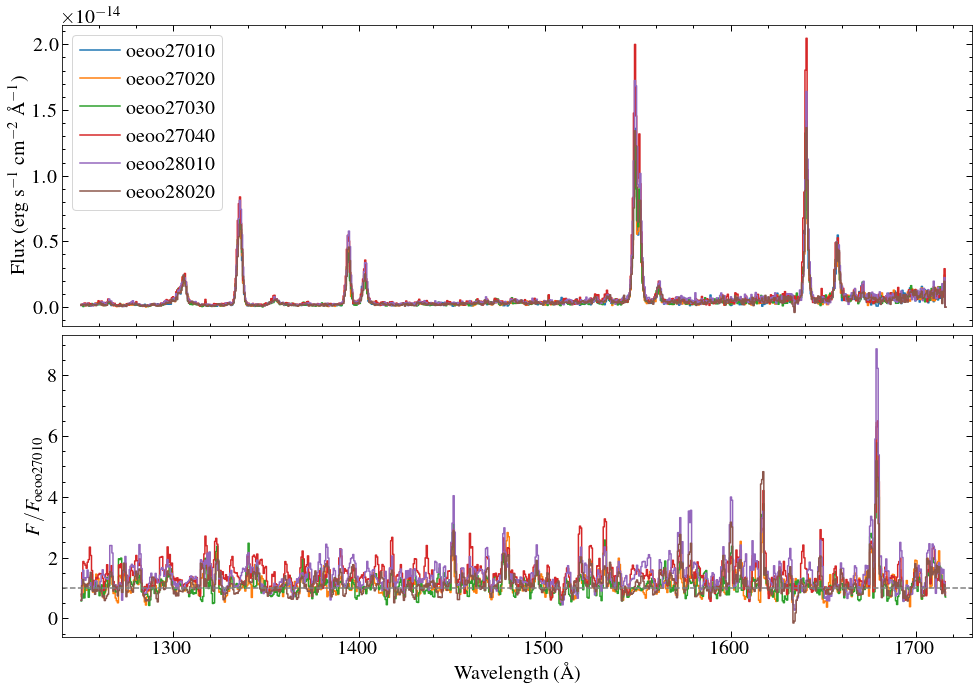

In [8]:
plt.figure(figsize=(14, 10))

plt.subplot(211)
for x in x1ds[0:6]:
    # print(x)
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    root = fits.getheader(x, 0)['ROOTNAME']
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1250
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', label=root)
plt.legend(frameon=True, loc=2)
plt.xticks(visible=False)
plt.xlim(1240, 1730)
    
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

plt.subplot(212)
n = 0
for x in x1ds[0:6]:  
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1250
    w, f, e = w[mask], f[mask], e[mask]
    if n == 0:
        wc, fc, ec = w, f, e
        root = fits.getheader(x, 0)['ROOTNAME']
        plt.plot([0,0], [0,0])
    else:
        ratio = f/fc
        ratio = convolve(ratio,  Box1DKernel(3))
        plt.step(w, ratio, where='mid')
    n +=1
    
plt.xlim(1240, 1730)

print(root)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('$F/F_{\mathrm{oeoo27010}}$')
plt.axhline(1, ls='--', c='0.5')
# plt.legend(frameon=True, loc=4)
# plt.title('HD 120411')
# plt.xlim(1130, 5600)
plt.tight_layout()
plt.subplots_adjust(hspace=0.03)
plt.savefig('plots/hd120411_varcheck.pdf')
plt.savefig('plots/HD-120411_varcheck.png', facecolor='w')

Mg ii lines?

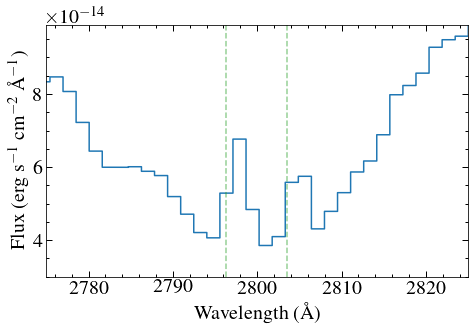

In [9]:
plt.figure(figsize=(7, 5))
for x in x1ds[6:7]:
    # print(x)
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    # root = fits.getheader(x, 0)['ROOTNAME']
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # mask = w > 1250
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', label=root)
    plt.step(w, e, where='mid')
# plt.legend(frameon=True, loc=2)
# plt.xticks(visible=False)
plt.xlim(2775, 2825)
plt.ylim(0.3e-13, 0.99e-13)

lines=[2796.35, 2803.53]
[plt.axvline(line, ls='--', c='C2', alpha=0.5) for line in lines]
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.tight_layout()


/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27010_x1d.fits
G140L
85.24121


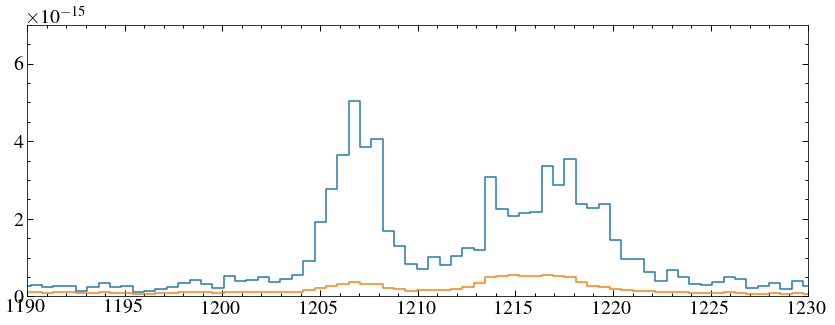

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27020_x1d.fits
G140L
85.70035


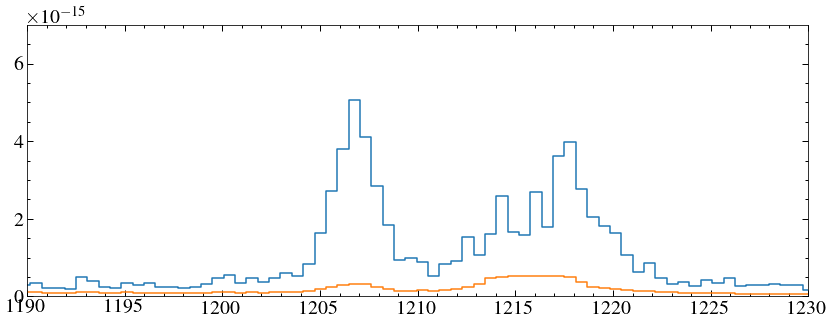

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27030_x1d.fits
G140L
85.91894


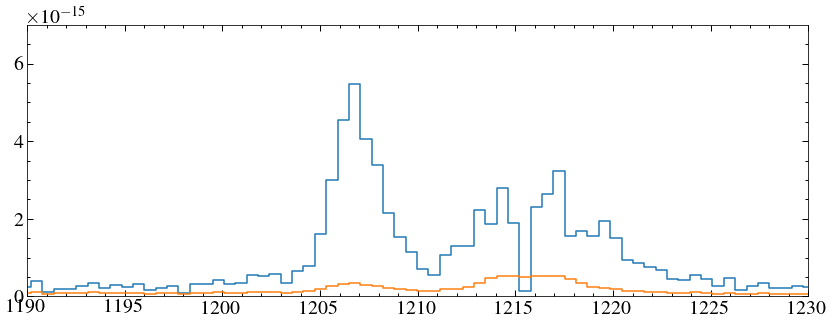

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27040_x1d.fits
G140L
85.88886


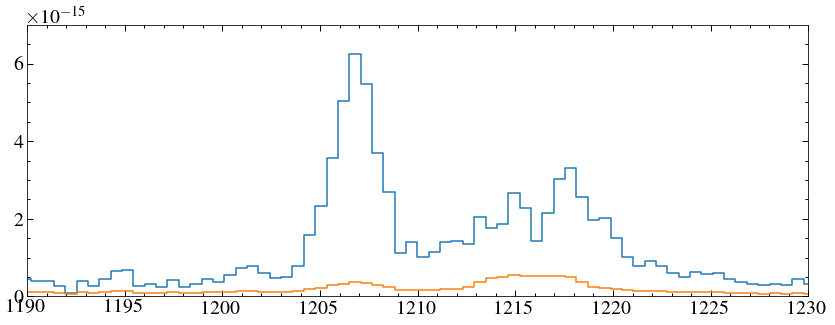

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28010_x1d.fits
G140L
88.22849


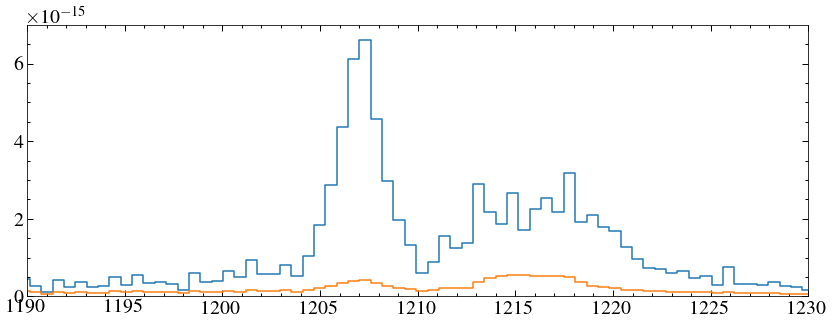

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28020_x1d.fits
G140L
88.42286


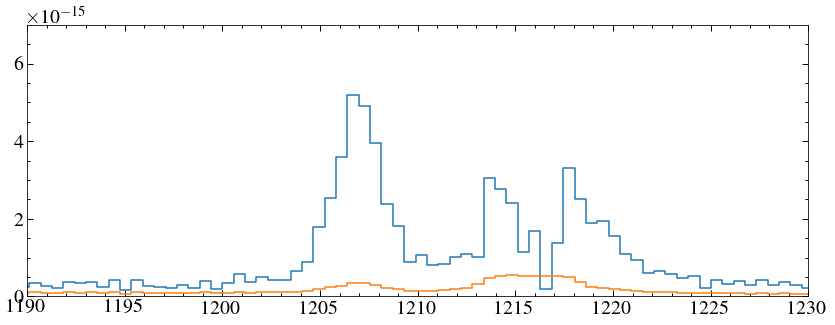

In [10]:
for x in x1ds[0:6]:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # mask = w > 1160
    # w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1')
    # plt.step(w, data['DQ'], where='mid', c='C1')
    
    plt.xlim(1190, 1230)
    plt.ylim(0, 0.7e-14)
    # plt.ylim(-1, 20)
    plt.show()

(0.0, 7e-15)

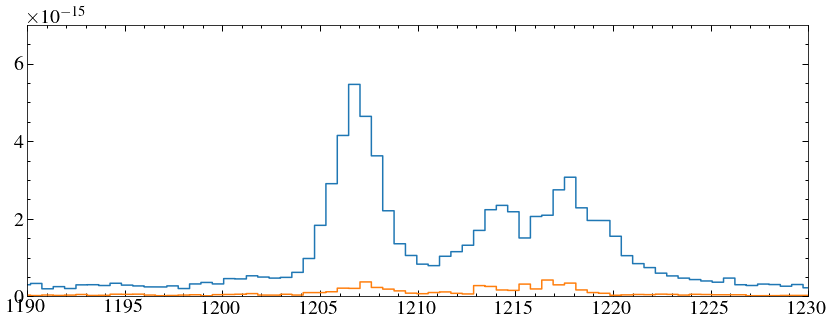

In [11]:
plt.step(w_fuv, f_fuv, where='mid', label='G140L')
plt.step(w_fuv, e_fuv, where='mid', label='G140L')
plt.xlim(1190, 1230)
plt.ylim(0, 0.7e-14)

In [12]:
newdata = Table([w_fuv*u.AA, f_fuv*u.erg/u.s/u.cm**2/u.AA, e_fuv*u.erg/u.s/u.cm**2/u.AA], names=['WAVELENGTH', 'FLUX', 'ERROR'])
primary_hdu = fits.PrimaryHDU(header=fits.getheader(x,0))
hdu = fits.table_to_hdu(newdata)
hdu.name='SPECTRUM'
root_hdu = fits.table_to_hdu(Table([roots], names=['ROOTNAMES']))
root_hdu.name = 'ROOTNAMES'
hdul = fits.HDUList([primary_hdu, hdu, root_hdu])
hdul.writeto('misc_data/hd120411_g140l_coadd.fits', overwrite=True)

In [13]:
from astropy.convolution import convolve_fft
from astropy.convolution import Gaussian1DKernel

def smear(w,f, R, w_sample=1):
    '''
    Smears a model spectrum with a gaussian kernel to the given resolution, R.
    Adapeted from https://github.com/spacetelescope/pysynphot/issues/78

    Parameters
    -----------

    w,f:  spectrum to smear

    R: int
        The resolution (dL/L) to smear to

    w_sample: int
        Oversampling factor for smoothing

    Returns
    -----------

    sp: PySynphot Source Spectrum
        The smeared spectrum
    '''

    # Save original wavelength grid and units
    w_grid = w
    

    # Generate logarithmic wavelength grid for smoothing
    w_logmin = np.log10(np.nanmin(w_grid))
    w_logmax = np.log10(np.nanmax(w_grid))
    n_w = np.size(w_grid)*w_sample
    w_log = np.logspace(w_logmin, w_logmax, num=n_w)

    # Find stddev of Gaussian kernel for smoothing
    R_grid = (w_log[1:-1]+w_log[0:-2])/(w_log[1:-1]-w_log[0:-2])/2
    sigma = np.median(R_grid)/R
    if sigma < 1:
        sigma = 1

    # Interpolate on logarithmic grid
    f_log = np.interp(w_log, w_grid, f)

    # Smooth convolving with Gaussian kernel
    gauss = Gaussian1DKernel(stddev=sigma)
    f_conv = convolve_fft(f_log, gauss)

    # Interpolate back on original wavelength grid
    f_sm = np.interp(w_grid, w_log, f_conv)

    # Write smoothed spectrum back into Spectrum object
    return w_grid, f_sm

In [14]:

import importlib
import prepare_phoenix_svo as pp
importlib.reload(pp)

<module 'prepare_phoenix_svo' from '/home/david/work/meats/SEDs/prepare_phoenix_svo.py'>

4.244669285175409


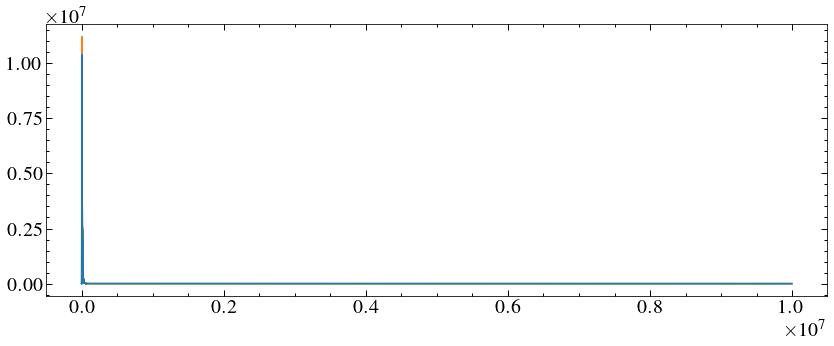

In [15]:
G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)
mass = 1.22

teff = 5675
teff_e = 75
radius = 1.38
distance = (1000/7.8288000)
save_path = 'models/'
star = 'NGTS_10'
g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
print(np.log10(g.value))
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'logg': np.log10(g.value), 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc, 'Teff_e':teff_e}
pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=False, plot=False, make_error=True)
normfac = ((radius*R)/(distance*u.pc.to(u.m)))**2

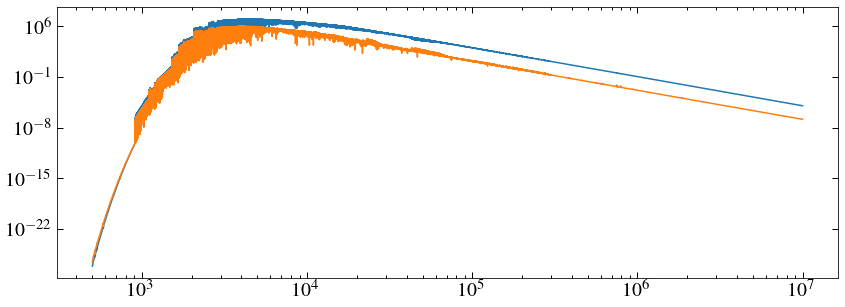

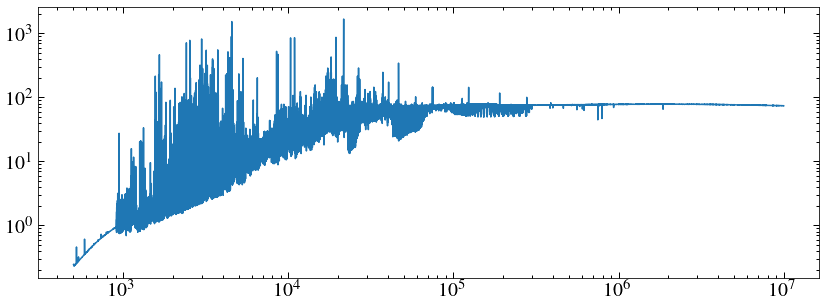

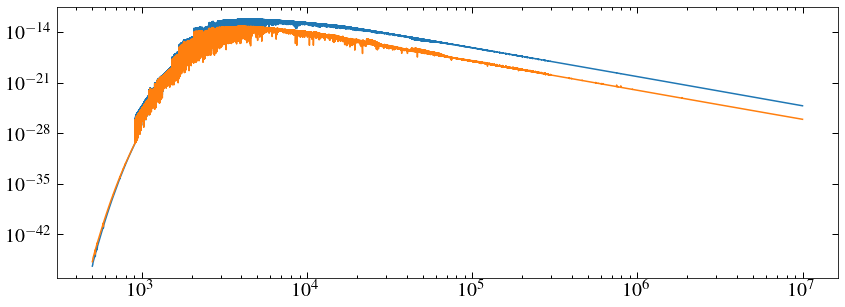

In [16]:
plt.plot(pw, pf)
plt.plot(pw, pe)

plt.yscale('log')
plt.xscale('log')
# plt.xlim(7000, 8000)
plt.show()

plt.plot(pw, pf/pe)

plt.yscale('log')
plt.xscale('log')
plt.show()

plt.plot(pw, pf*normfac)
plt.plot(pw, pe*normfac)

plt.yscale('log')
plt.xscale('log')
# plt.xlim(7000, 8000)
plt.show()

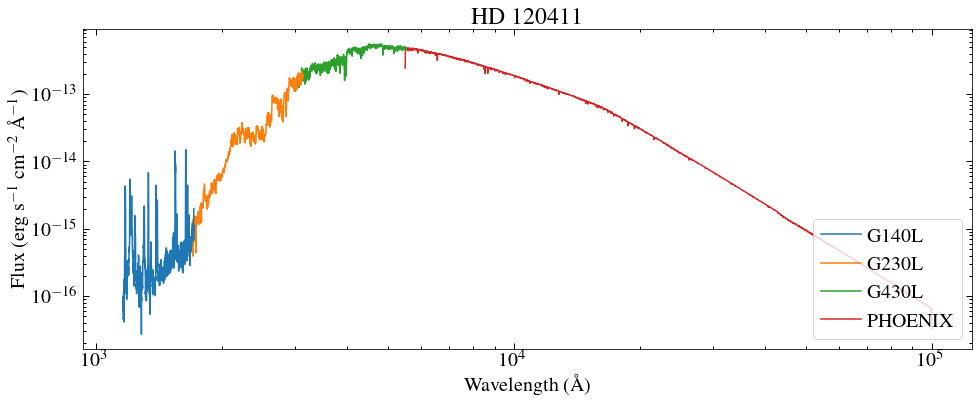

In [17]:
pmask = (pw > 5500) & (pw < 1e5)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = smear(pwi, pfi, 2000)

plt.figure(figsize=(14, 6))

plt.step(w_fuv, f_fuv, where='mid', label='G140L')
# plt.step(w_fuv, e_fuv, where='mid')
plt.step(w_nuv, f_nuv, where='mid', label='G230L', zorder=-1)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2)
plt.step(pwi, pfi, where='mid', label='PHOENIX', zorder=-10)

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=4)
plt.title('HD 120411')
# plt.xlim(1130, 5600)
plt.tight_layout()

In [18]:
from  xspec import *

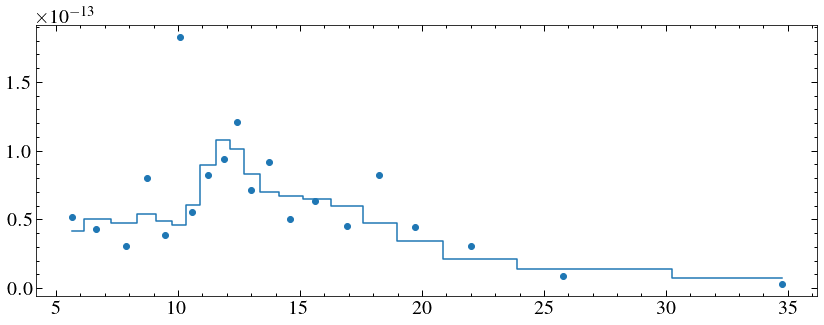

In [19]:
def apec_to_spec(path):
    """
    Converts an xspec plot model wdata textfile from counts to ergs. 
    Assumes that the wavelength array is in Angstrom and the flux arrays are in counts/s/cm2/A
    """
    xrt = np.loadtxt(path, skiprows=3)
    xrt = xrt[::-1]
    wx = xrt[:,0]*u.AA
    kevx = xrt[:, 1]*u.keV
    fx  = (xrt[:,2] * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
    model  = (xrt[:,4] * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
    return wx, kevx, fx, model

xpath = '/media/david/2tb_ext_hd/hddata/meats/swift/hd120411/spectrum/hd120411_xrt_fit.txt'
wxi, kevx, fxi, model = apec_to_spec(xpath)
plt.step(wxi, model, where='mid')
plt.scatter(wxi, fxi)

Reading APEC data from 3.0.9


Model phabs<1>(apec<2> + apec<3>) Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Model phabs<1>(apec<2> + apec<3>) Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH

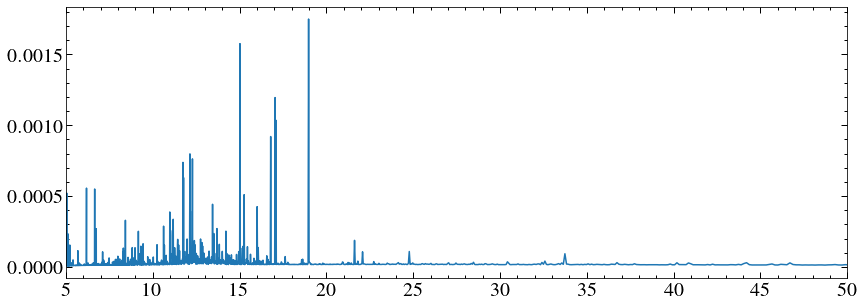

In [20]:
mod = Model('phabs*(apec+apec)', setPars={1:1e-3, 2:0.39, 3:0.4, 5:4e-4, 6:1.3, 7:0.4, 9:7.7e-4})
Plot.xAxis = "angstrom"
Plot.perHz = False
Plot.area=True
fluxnum = mod.flux[0]
AllModels.setEnergies("0.1 2.5 2400")
Plot("model")
xVals = Plot.x()
yVals = Plot.model()
wx = xVals*u.AA
fx  = (yVals * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
plt.plot(wx, yVals)
plt.xlim(5, 50)
plt.show()

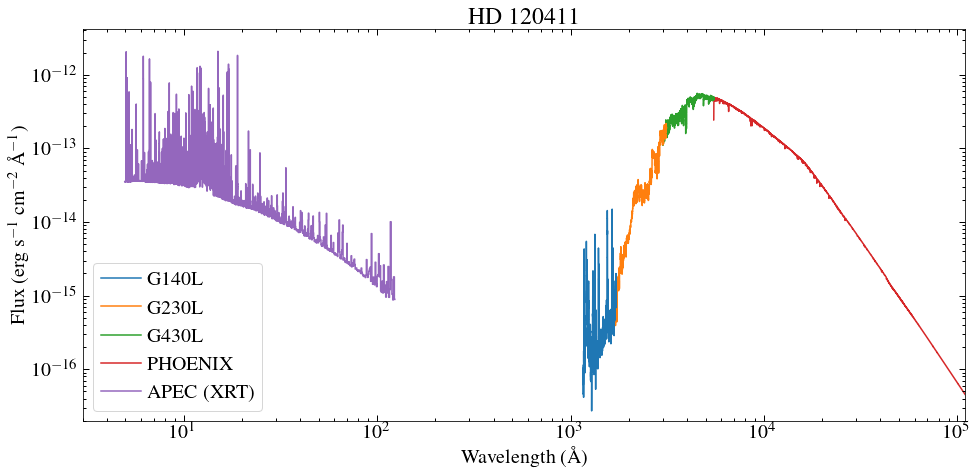

In [21]:
pmask = (pw > 5500) & (pw < 2e5)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = smear(pwi, pfi, 2000)

plt.figure(figsize=(14, 7))

plt.step(w_fuv, f_fuv, where='mid', label='G140L')
# plt.step(w_fuv, e_fuv, where='mid')
plt.step(w_nuv, f_nuv, where='mid', label='G230L', zorder=-1)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2)
plt.step(pwi, pfi, where='mid', label='PHOENIX', zorder=-10)
plt.step(wx, fx, where='mid', label='APEC (XRT)')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=3)
plt.title('HD 120411')
plt.xlim(3, 1.1e5)
plt.ylim(2e-17)
plt.tight_layout()
plt.savefig('plots/hd120411_xrt_sed.pdf')
plt.savefig('plots/hd120411_xrt_sed.png', facecolor='w')

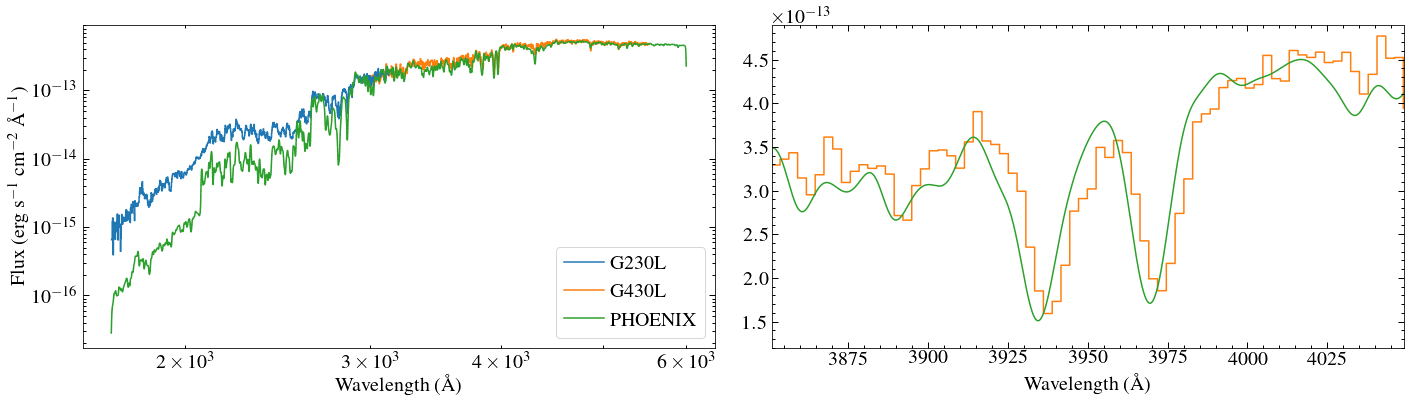

In [22]:
pmask = (pw > 1700) & (pw < 6000)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = smear(pwi, pfi, 1000)

plt.figure(figsize=(20, 6))
plt.subplot(121)

# plt.step(w_fuv, f_fuv, where='mid', label='G140L')
# plt.step(w_fuv, e_fuv, where='mid')
plt.step(w_nuv, f_nuv, where='mid', label='G230L', zorder=-1)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2)
plt.step(pwi, pfi, where='mid', label='PHOENIX', zorder=1)

plt.yscale('log')
plt.xscale('log')

# plt.xlabel('Wavelength (\AA)')
# plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=4)
# plt.title('HD 120411')
# plt.xlim(1130, 5600)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.subplot(122)

pmask = (pw > 2900) & (pw < 5600)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = smear(pwi, pfi, 1000)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2, c='C1')
plt.plot(pwi, pfi, label='PHOENIX', zorder=1, c='C2')
plt.xlabel('Wavelength (\AA)')
# plt.xlim(4800, 4950)
plt.xlim(3851, 4049)
# plt.ylim(3e-13, 6e-13)
plt.ylim(1.2e-13, 4.9e-13)
# plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

plt.tight_layout()

In [23]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

In [24]:
# pmask = (pw > 5500) & (pw < 2e5)
# pwi, pfi = pw[pmask], pf[pmask]*normfac
# pwi, pfi = smear(pwi, pfi, 1000)

# plt.figure(figsize=(14, 7))

# plt.step(w_fuv, f_fuv, where='mid', label='G140L')
# # plt.step(w_fuv, e_fuv, where='mid')
# plt.step(w_nuv, f_nuv, where='mid', label='G230L')#, zorder=-1)
# plt.step(w_opt, f_opt,  where='mid',label='G430L')#, zorder=-2)
# plt.step(pwi, pfi, where='mid', label='PHOENIX')#, zorder=-10)
# plt.plot(wx.value, fx.value, label='APEC (XRT)')
# mplcyberpunk.add_glow_effects()
# # mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.5)
# plt.yscale('log')
# plt.xscale('log')

# plt.xlabel('Wavelength (\AA)')
# plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels[::-1], handles[::-1]))
# plt.legend(by_label.values(), by_label.keys(), frameon=True, loc=3)
# plt.title('HD 120411')
# plt.xlim(4, 1.1e5)
# plt.ylim(2e-17, 5e-12)
# plt.tight_layout()
# plt.savefig('plots/hd120411_cp.pdf')
# plt.savefig('plots/hd120411_cp.png', facecolor='w')

In [25]:
lcpath = '/media/david/2tb_ext_hd/hddata/meats/chandra/hd120411/24675/working/test_100s_lc.fits'
lc = fits.getdata(lcpath, 1)
lc.names

['TIME_BIN',
 'TIME_MIN',
 'TIME',
 'TIME_MAX',
 'COUNTS',
 'STAT_ERR',
 'AREA',
 'EXPOSURE',
 'COUNT_RATE',
 'COUNT_RATE_ERR',
 'BG_COUNTS',
 'BG_ERR',
 'BG_AREA',
 'BG_EXPOSURE',
 'BG_RATE',
 'NORM_BG_COUNTS',
 'NORM_BG_ERR',
 'NET_COUNTS',
 'NET_ERR',
 'NET_RATE',
 'ERR_RATE']

<ErrorbarContainer object of 3 artists>

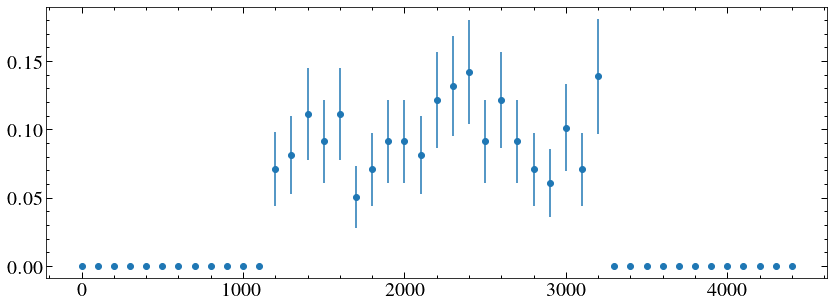

In [26]:
plt.errorbar(lc['TIME']-lc['TIME'][0], lc['COUNT_RATE'], yerr=lc['COUNT_RATE_ERR'], marker='o', ls='none')

In [27]:
print(np.mean(lc['COUNT_RATE'][lc['COUNT_RATE'] > 0]))

0.0949512709131027


TESS?

In [28]:
import lightkurve as lk


In [29]:
search_result = lk.search_lightcurve('TIC 166527623')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 11,2019,SPOC,120,166527623,0.0
1,TESS Sector 11,2019,TESS-SPOC,1800,166527623,0.0
2,TESS Sector 11,2019,QLP,1800,166527623,0.0
3,TESS Sector 38,2021,SPOC,120,166527623,0.0
4,TESS Sector 38,2021,TESS-SPOC,600,166527623,0.0
5,TESS Sector 38,2021,QLP,600,166527623,0.0


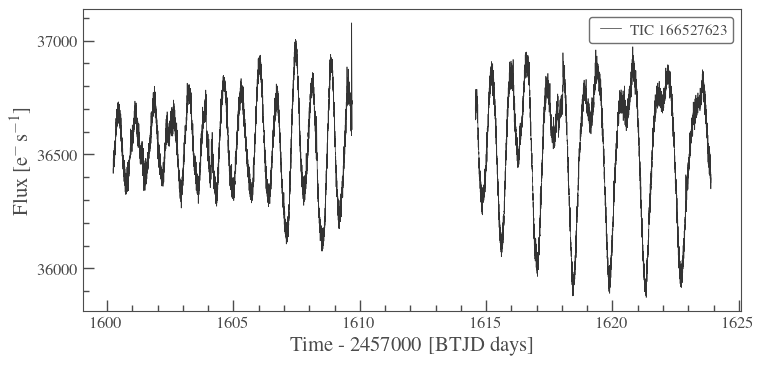

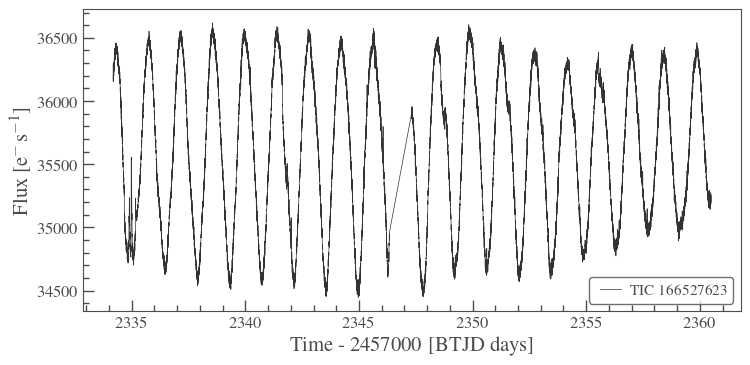

In [32]:
for sr in [search_result[0], search_result[3]]:
    lc = sr.download(download_dir='mastDownload/')
    lc.plot()

cool. Only a few flares though, compare rate with UV?